# Data Visualization in Python - Matplotlib

## Matplotlib

Matplotlib is a plotting library for the Python programming language that is very customizable and provides a great control of every element in a plot.

___
## Section I - Basic Plots

Importing matplotlib using its general alias

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Specifying so will output our plots and stores within the notebook. Also, this eliminates the need of writing `plt.show()` which you'd need if you are using a different editor.

In [4]:
%matplotlib inline

Matplotlib supports two ways of creating plots. 

1. Function
2. Object Oriented

___
## Section II - Functional Approach 

In [32]:
x = np.arange(-4, 5, 1)
y = x**2 

In [33]:
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [34]:
y

array([16,  9,  4,  1,  0,  1,  4,  9, 16])

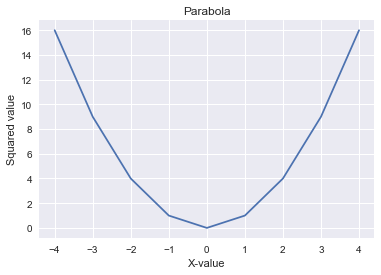

In [41]:
plt.plot(x, y) 
plt.xlabel('X-value')
plt.ylabel('Squared value')
plt.title('Parabola')
plt.show()

### Multiplots in same figure

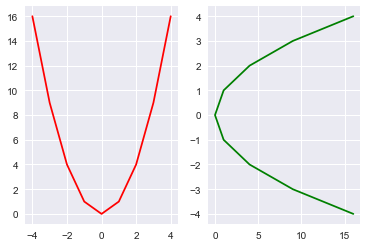

In [42]:
# Plot 1
plt.subplot(1,2,1)
plt.plot(x, y, 'r')

# Plot 2
plt.subplot(1,2,2)
plt.plot(y, x, 'g');

___
##  Section III - Object Oriented Method

We instantiate figure objects and then call methods or attributes from that object. Useful when you need multiple plots on one figure 

In [45]:
# Create an empty figure (empty canvas)
fig = plt.figure()

In [46]:
# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

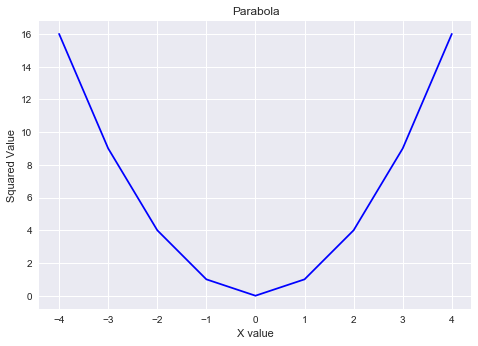

In [55]:
# Create an empty figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([1, 1, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('X value') # xlabel vs set_xlabel
axes.set_ylabel('Squared Value')
axes.set_title('Parabola')

### Legend

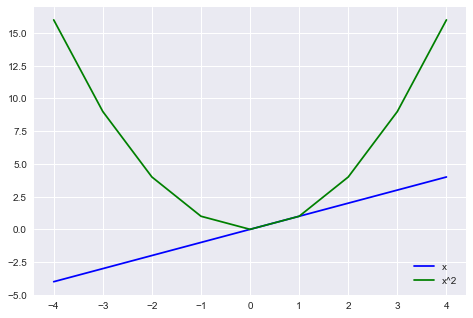

In [119]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x, 'b', label="x")
ax.plot(x, x**2, 'g', label="x^2")
ax.legend(loc = 0)

### Multiplot - Plot inside a plot

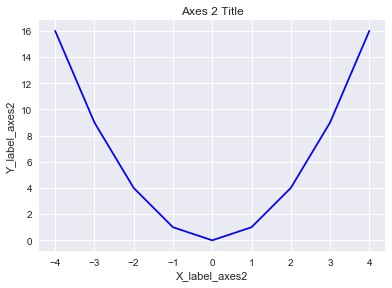

In [56]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

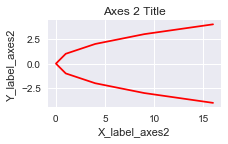

In [57]:
fig = plt.figure()

axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

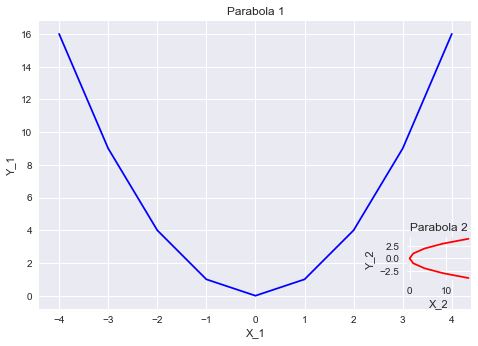

In [96]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([1, 1, 1, 1]) # main axes
axes2 = fig.add_axes([1.85, 1.1, 0.15, 0.15]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_1')
axes1.set_ylabel('Y_1')
axes1.set_title('Parabola 1')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_2')
axes2.set_ylabel('Y_2')
axes2.set_title('Parabola 2');

___
## Section IV - Formatting the plots

### Figure size, aspect ratio and DPI

You can adjust the aspect ratio, dots per inch (DPI) using `figsize` and `dpi` keyword arguments. 
* `figsize` accpets width and height of the figure in inches
* `dpi` accpts number of pixels per inch (dots-per-inch)


In [97]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function:

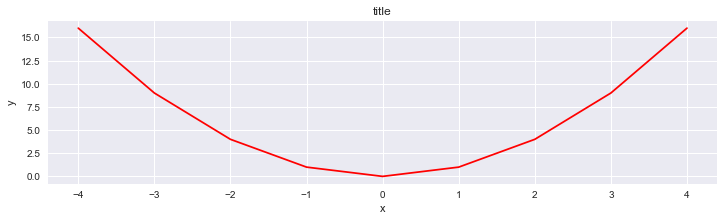

In [98]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Export figures

Matplotlib supports formats such as PNG, JPG, EPS, SVG, PGF and PDF to save your figure.

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [100]:
fig.savefig("plot.png")

### Setting colors and style

Matplotlib supports 'MATLAB-like' syntax to modify colors and styles of your plots. 

1. `'b--'` means blue dashed line
2. `'g.'`  means green line with marker

Colors - 
 
        b: blue
        g: green
        r: red
        c: cyan
        m: magenta
        y: yellow
        k: black
        w: white

Styles - 
    
        '-'  solid line style
        '--' dashed line style
        '-.' dash-dot line style
        ':'  dotted line style
        '.'  point marker
        ','  pixel marker
        'o'  circle marker

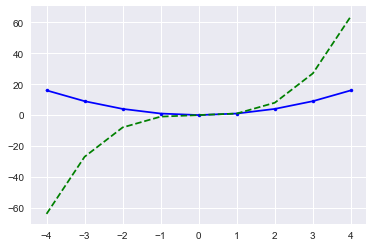

In [124]:
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b.-') # blue line with marker
ax.plot(x, x**3, 'g--') # green dashed line

### Colors using hexadecimal code

You can also use color names or RGB hexadecimal codes to color your plot. Matplotlib also supports tuning the tranparancy of the line by changing alpha.

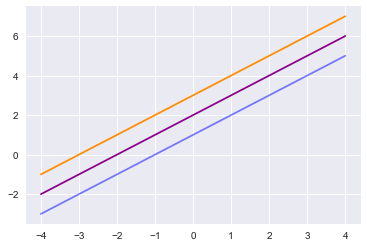

In [125]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

___
## Section V - Logarithmic scale

Often in real world datasets, your data will not be on the same scale. 

* For example: I am currently solving using a bank's marketing dataset to predict if a customer is likely to accept or reject an offer based on features like 'GDP Growth' of the city the customer lives in, 'Annual Salary' etc. 

The GDP growth can vary between 1 to 5 whereas the salary can range from 50,000 to 500,000.

There is a huge different in the scale. Situations like these would require you to use 'logarithmic' scale.

You can set a logarithmic scale for one or both axes using `set_xscale` and `set_yscale` methods

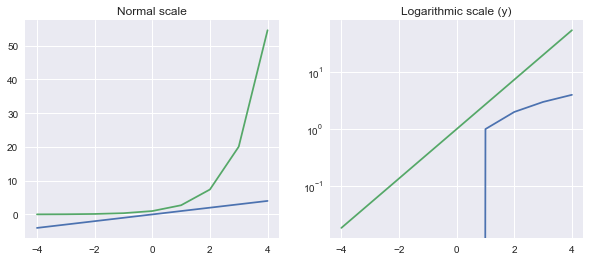

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

___
## Section VI - Ticks and tick labels

In [134]:
x = np.arange(0,11,1)
y = x**2

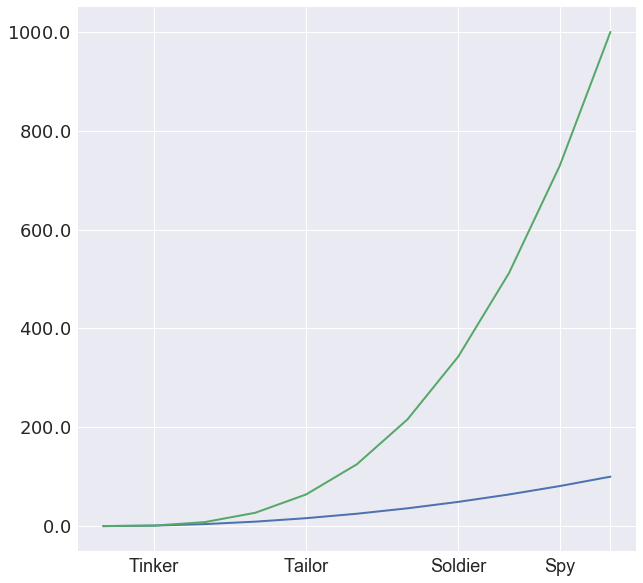

In [152]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 4, 7, 9, 10])
ax.set_xticklabels(['Tinker', 'Tailor', 'Soldier', 'Spy'], fontsize=18)

yticks = [0, 200, 400, 600, 800, 1000]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # LaTeX formatted labels